<html>
<table width="100%" cellspacing="2" cellpadding="2" border="1">
<tbody>
<tr>
<td valign="center" align="center" width="25%"><img src="../../../media/decartes.jpg"
alt="DeCART Icon" width="128" height="171"><br>
</td>
<td valign="center" align="center" width="75%">
<h1 align="center"><font size="+3">DeCART Summer School<br>
for<br>
Biomedical Data Science</font></h1></td>
<td valign="center" align="center" width="25%"><img
src="../../../media/U_Health_stacked_png_red.png" alt="Utah Health
Logo" width="128" height="134"><br>
</td>
</tr>
</tbody>
</table>
<br>
</html>

# Accessing Remote Data

## Internet Protocols

What we now know as the internet has its roots in the [ARPA Net]() that was designed to exchange data between computers across the country to facilitate decision making regarding potential nuclear attacks. The original ARPA net connected UCLA, UCSB, Stanford, and the University of Utah.

![ARPA Net](https://www.sri.com/work/timeline-innovation/images/25_bw_arpanet2.png)

[Various protocols](https://en.wikipedia.org/wiki/Internet_protocol_suite) have been defined for computers to communicate with each other across a network. The most important of these protocols for our purposes are


### Application Protocols
* [ftp](https://en.wikipedia.org/wiki/File_Transfer_Protocol)
* [HTTP](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol)
* [ssh](https://en.wikipedia.org/wiki/Secure_Shell)

### FTP

FTP stands for **f**ile **t**ransfer **p**rotocol. FTP is an old protocol that has largely been replaced by more secure protocols. However, ftp is still used to distribute data. For example, the NCI hosts an ftp site for distributing data:

![NIC ftp site](../../../media/nci.png)

One of the data sets we will be using in part 2 of the boot camp is [ClinVar](https://www.ncbi.nlm.nih.gov/clinvar/intro/) which is a resource for discovering the clinical significance of observed genetic variations.

We can use the [``wget``](https://www.gnu.org/software/wget/manual/wget.html) program to use the ftp protocol to download data from an ftp site:

## Exercise

In a terminal or bash shell in the notebook, create a directory ``~/work/nci``. Change directory to that new directory and use ``wget`` to download the following file: ``ftp://ftp.ncbi.nlm.nih.gov/pub/clinvar/tab_delimited/var_citations.txt``

In [1]:
from remote_quizzes import *
nci_ftp_quiz()

var_citations.txt exist in the correct location


/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2909: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


var_citations.txt read correctly


## Advantages of scripting data acquisition

One of the advantages of scripting data acquisition (e.g. using `wget` to pull data from an ftp site) is that we can make scripts that exactly execute what we did and thus we can exactly redo what we did.

## Exercise

* If you have not already done so, create a directory `~/bin`
* Modify your .bashrc file with `vim` so export $PATH with this directory prepended:

```bash
export PATH=$HOME/bin:$PATH
```
* In `~/bin` create a file named `get_clinvar`. This program should contain the following 

```bash
#! /bin/bash

wget ftp://ftp.ncbi.nlm.nih.gov/pub/clinvar/tab_delimited/var_citations.txt -O ~/bin/var_citations.txt.07032018

```

The first line

```bash
#! /bin/bash
```

tells the computer that this script should be executed by a bash process.

* Try running `~/bin/get_clinvar`? What do you have to do to get this to work?

## [``pandoc``](http://pandoc.org/)

Pandoc is a very useful tool that converts a document in one format to a another format. It is quite versatile in the kind of documents it can handle, including

* Word documents (*.docx)
* HTML (*.html)
* [Markdown](https://daringfireball.net/projects/markdown/syntax) (*.md)
* [reStructedText](http://docutils.sourceforge.net/rst.html) (*.rst)
* [LaTex](https://www.latex-project.org/about/) (*.tex)

There are many more formats pandoc understands. See the [documentation](http://pandoc.org/).

In these courses, we will make much use of Markdown and LaTex. For example, these notebooks are set in Markdown.



## [``curl``](https://curl.haxx.se/docs/manpage.html)

``curl`` is a tool similar to ``wget``, but with perhaps more general functionality. 

## Example

In this example we are going to explore a little bit of the differences between ``wget`` and ``curl``. As part of this exploration we are going to combine Unix pipes and pandoc to convert the HTML document that is pulled from the web to a more user readable form.

The author of ``curl`` has written a comparison between the two tools at ``https://daniel.haxx.se/docs/curl-vs-wget.html``. 

In a terminal type the following command:

```bash
curl https://daniel.haxx.se/docs/curl-vs-wget.html | pandoc -s --from=html --to=plain | less
```

## Exercise

* Explain each step between the pipes to your neighbor.


## Exercise

Change the output format (``--to=plain``) to other formats to explore them, including not converting the HTML at all.

## Structure of Web Servers

Data on the web is provided using applications like Apache and Nginx. These applications map directories on a server (computer) to web addresses. We have created an Nginx web server on our network. For Nginx the directory root that is mapped to the web is ``/usr/share/nginx/html``. Here is what the directory tree there looks like:

![Nginx tree](../../../media/webserver.png)

``index.html`` is the HTML page that maps to the url base.

We have a web server running at ``http://web_server``:

![index image](../../../media/index.html.png)

We can pull the web page content to our computer using curl:

In [ ]:
%%bash
curl http://web_server

Any file sitting below ``/user/share/nginx/html`` maps with an address matching its relative file path. So, for example the, JPEG file located at ``/user/share/nginx/html/imgs/bigneck.jpg`` maps to ``http://web_server/imgs/bigneck.jpg``

![big neck](../../../media/big_neck.png)

### We can use `wget` to pull an image and then use Python to display it

In [2]:
%%bash

wget http://web_server/imgs/bigneck.jpg -O ~/test2.jpg

--2018-07-03 16:31:49--  http://web_server/imgs/bigneck.jpg
Resolving web_server (web_server)... 10.0.3.8
Connecting to web_server (web_server)|10.0.3.8|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81659 (80K) [image/jpeg]
Saving to: ‘/home/rgrotewold/test2.jpg’

     0K .......... .......... .......... .......... .......... 62% 33.6M 0s
    50K .......... .......... .........                       100%  103M=0.002s

2018-07-03 16:31:49 (44.8 MB/s) - ‘/home/rgrotewold/test2.jpg’ saved [81659/81659]



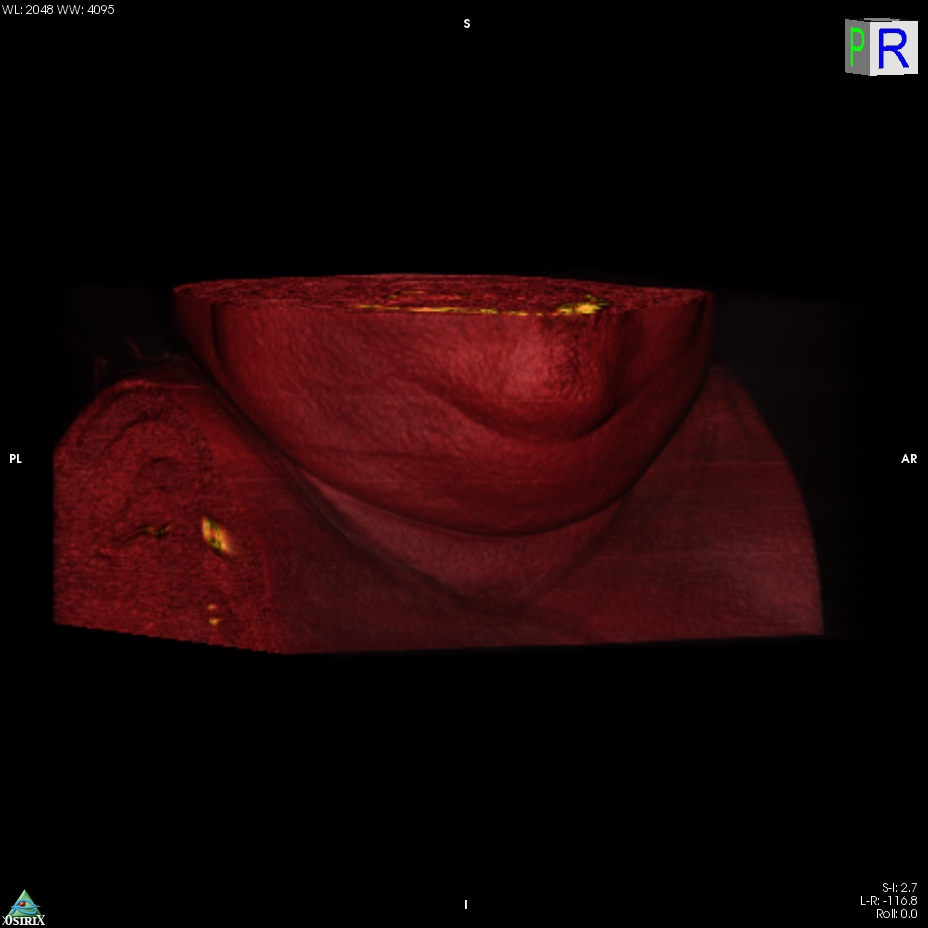

In [4]:
from IPython.display import Image, display
display(Image("/home/rgrotewold/test2.jpg"))

And ``./data/carotid.txt`` maps to ``http://web_server/data/carotid.txt``

![carotid image](../../../media/carotid.png)

In [5]:
%%bash

curl http://web_server/data/carotid.txt

BEGIN REPORT
A carotid u/s showed ""no changes from previous"", but by report, 
 unsure of previous findings.

END REPORT
BEGIN REPORT
Carotid dopplers ([**1-30**]) notable for 60-69%R ICA occlusion and 
 L-vertebral not visualized (so could be occulded or hypoplastic)

END REPORT
BEGIN REPORT
Ultrasound of the carotids revealed right ICA with 80-99% occlusion and L ICA with 40% 
 occlusion.
 "
 AM

END REPORT
BEGIN REPORT
CAROTID SERIES COMPLETE
 
 Reason: TIA
 
 UNDERLYING MEDICAL CONDITION:
 72 year old man with TIA 
 REASON FOR THIS EXAMINATION:
 Eval for carotid stenosis 
 CAROTID STUDY
 
 HISTORY: TIA.
 
 FINDINGS: No prior studies for comparison. There is complete 
 occlusion of the left ICA and associated internalization of the 
 external carotid artery on the left. There is also absent flow 
 involving the left vertebral artery. There is a significant 
 focal hypoechoic plaque involving the right ICA. Similar plaque 
 involving the right ECA. The peak systolic velocities on th

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49361  100 49361    0     0  9640k      0 --:--:-- --:--:-- --:--:-- 9640k


## Images and Medicine

Visual information is integral to medicine. Digital imaging technologies and electronic health records enable the greater use of images in medicine. Some disciplines, such as radiology and surgical pathology, are entirely built around visual information and captured images. In fields like dermatology, images are becoming more prevalent. In radiology, medical-specific standards are used to represent images while dermatology tends to use general photographic image standards.




## Medical Specific Standards for Images

* [DICOM](https://en.wikipedia.org/wiki/DICOM)

## General Image Standards

* [TIFF: Tagged Image File Format](https://en.wikipedia.org/wiki/Tagged_Image_File_Format)
* [JPEG: Joint Photographic Experts Group](https://en.wikipedia.org/wiki/JPEG)
* [PNG: Portable Network Graphics](https://en.wikipedia.org/wiki/Portable_Network_Graphics)


### Exercise

When defining a standard for a digital image, what are some of the information about the image you would need to represent/record?

## Install a program for reading image headers for photographic images

The cell below will create an executable program EXIF.py. This file will be installed in your path (use ``which`` to see where it is installed) and can be used to read the metadata for an image.

In [ ]:
%%bash
pip install exifread

## Exercise

Make the directories ``~/work/images_wget`` and ``~/images_curl``. Use both ``wget`` and ``curl`` to download the images from ``mynginx`` to the wget and curl directories respectively. Use the ``EXIF.py`` program to answer the following questions:

1. What are the image dimensions of 04.jpg?
1. What is the date 04.jpg was acquired?
1. What is the color space of 04.jpg?
1. What are the image dimensions of ct6.jpg?
1. What is the date ct6.jpg was acquired?
1. What is the color space of ct6.jpg?

## Display an image using Markdown

We can display an image in this notebook using Markdown. The syntax is

```markdown

![some label](PATH_TO_FILE)
```

Edit the markdown cell below to display an image you have pulled from mynginx

### Display image here

![]()